In [38]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [39]:
beer_df = pd.read_csv('Data/beer_reviews_BeerAdvocate.csv')
display(beer_df[:1].head())

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986


In [40]:
# list of column names
list(beer_df.columns)

['brewery_id',
 'brewery_name',
 'review_time',
 'review_overall',
 'review_aroma',
 'review_appearance',
 'review_profilename',
 'beer_style',
 'review_palate',
 'review_taste',
 'beer_name',
 'beer_abv',
 'beer_beerid']

### 
The dataset started out with 1586614 records, which was reduced to 1518478 records, meaning a total 
of 68136 record or 4.29% of data was dropped.

In [41]:
# Print the informaton about the columns
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [42]:
# Count unique Brewery and Beer and users reviews beer
# unique brewery
print("No of unique brewery by name:", beer_df.brewery_name.nunique())
# unique beer
print("No of unique beer by name:", beer_df.beer_name.nunique())
# unique users reviewed beer
print("No of unique users, reviewed beers:", beer_df.review_profilename.nunique())

No of unique brewery by name: 5742
No of unique beer by name: 56857
No of unique users, reviewed beers: 33387


In [43]:
# missing values
print("Missing values in Dataset: /n", beer_df.isnull().sum())

Missing values in Dataset: /n brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


In [44]:
# Drop Null values for Brewery_name, review_profilename, beer_abv
beer_df = beer_df.dropna(how="any")
print(beer_df.count())
start_count = beer_df.review_overall.count()
print("Total dataset:", start_count)

brewery_id            1518478
brewery_name          1518478
review_time           1518478
review_overall        1518478
review_aroma          1518478
review_appearance     1518478
review_profilename    1518478
beer_style            1518478
review_palate         1518478
review_taste          1518478
beer_name             1518478
beer_abv              1518478
beer_beerid           1518478
dtype: int64
Total dataset: 1518478


In [10]:
clean_beer_df = beer_df.dropna(subset=['brewery_name', 'beer_name', 'review_taste', 'review_overall', 'review_taste', 'review_aroma','beer_style'], how='any')
clean_beer_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [11]:
# clean Beer name to proper format
clean_beer_df.replace("'",'"',inplace=True)

###   we dropped duplicated reviews by the same reviewer for the same beer in the dataset. about 1.47% were dropped.

In [12]:
# drop duplicate reviews in the dataset.
# first sort by user overall rating
clean_beer_df = clean_beer_df.sort_values('review_overall',ascending=False)
# keep the highestrating from each user and drop the rest.
clean_beer_df = clean_beer_df.drop_duplicates(subset=['review_profilename', 'beer_name'],keep='first')
# count after duplicated items were dropped
end_count = clean_beer_df.review_overall.count()
# what percent of data that was duplicated

print(start_count,end_count)
print("percentage of duplicate values dropped:", ((start_count-end_count)/start_count)*100)

1518478 1496263
percentage of duplicate values dropped: 1.4629780609267964


In [13]:
# export the clean DF to csv
clean_beer_df.to_csv("Data/clean_beer_data.csv", index = False)

###  Data Exploration
##### 1. Top 10 Popular Breweries by Review Counts

In [45]:
# find top 10 popular Breweries by review counts
popular_brewery = beer_df.groupby('brewery_name').brewery_name.count()
popular_brewery = popular_brewery.sort_values(ascending= False)
popular_breweries = popular_brewery.iloc[0:10]
popular_breweries

brewery_name
Boston Beer Company (Samuel Adams)    38806
Dogfish Head Brewery                  33790
Stone Brewing Co.                     33009
Sierra Nevada Brewing Co.             28632
Bell's Brewery, Inc.                  24973
Rogue Ales                            23446
Founders Brewing Company              19951
Victory Brewing Company               19401
Lagunitas Brewing Company             16766
Avery Brewing Company                 16042
Name: brewery_name, dtype: int64

#### 2. Top 10 Breweries with most Beer Type

In [64]:
# top 10 breweries with most beer tpes
top_10_breweries_by_beertype = beer_df.groupby(['brewery_name']).beer_name.nunique().sort_values(ascending = False)
top_10_breweries_by_beertype = top_10_breweries_by_beertype.iloc[0:10]
top_10_breweries_by_beertype = pd.DataFrame(top_10_breweries_by_beertype)
top_10_breweries_by_beertype.columns = ['Top Breweries based on Beer type']
top_10_breweries_by_beertype

,Top Breweries based on Beer type
brewery_name,
Rock Bottom Restaurant & Brewery,522
Goose Island Beer Co.,304
Iron Hill Brewery & Restaurant,269
Minneapolis Town Hall Brewery,243
Port Brewing Company / Pizza Port,194
Mikkeller ApS,184
Cigar City Brewing,171
John Harvard's Brewery & Ale House,151
The Bruery,143


#### 3. Top 10 beers with number reviews

In [48]:
# top 10 beers with reviews count
top_10_popular_beers = pd.DataFrame(beer_df.groupby('beer_name').beer_name.count().sort_values(ascending = False).iloc[0:10])
top_10_popular_beers.columns = ['Beer Names with Reviews counts']
top_10_popular_beers

,Beer Names with Reviews counts
beer_name,
90 Minute IPA,3289
Old Rasputin Russian Imperial Stout,3110
Sierra Nevada Celebration Ale,2999
India Pale Ale,2960
Two Hearted Ale,2727
Stone Ruination IPA,2702
Arrogant Bastard Ale,2702
Sierra Nevada Pale Ale,2587
Stone IPA (India Pale Ale),2574


#### 4. Top 10 beers with highest overall reviews/ratings

In [49]:
# top 10 beers with highest ratings
Top_beer_ratings = beer_df[['beer_name','review_overall']].groupby('beer_name').review_overall.agg('mean').sort_values(ascending = False)
Top_beer_ratings = Top_beer_ratings.iloc[0:10]
Top_beer_ratings.reset_index()

,beer_name,review_overall
0,Kringle's Imperial Stout,5.0
1,Hoppycock,5.0
2,Triple OOO,5.0
3,Triple 7 India Pale Ale,5.0
4,Ammerndorfer Bier Spezial,5.0
5,HopCat Raging Centaur,5.0
6,Hopback Amber (Simcoe Dry Hopped),5.0
7,Hopnitized,5.0
8,Paul's Porter,5.0
9,Hoposauras Rex,5.0


#### 5. Top 10 beer styles by number of reviews

In [65]:
# top 10 Beer Styles by review counts
popular_beer_styles = pd.DataFrame(beer_df.groupby('beer_style').beer_style.count().sort_values(ascending = False).iloc[0:10])
popular_beer_styles.columns = ['Beer Styles by review counts']
popular_beer_styles

,Beer Styles by review counts
beer_style,
American IPA,113144
American Double / Imperial IPA,85105
American Pale Ale (APA),58072
Russian Imperial Stout,53424
American Double / Imperial Stout,50137
American Porter,46647
American Amber / Red Ale,41731
Belgian Strong Dark Ale,37498
Fruit / Vegetable Beer,31983


#### 6. Top 10 beer styles by overall reviews/ratings

In [66]:
## Beer Styles with top ratings

Top_rating_beer_styles = beer_df[['beer_style','review_overall']].groupby('beer_style').review_overall.agg('mean').sort_values(ascending = False).iloc[0:10]
Top_rating_beer_styles = pd.DataFrame(Top_rating_beer_styles)
Top_rating_beer_styles

,review_overall
beer_style,
American Wild Ale,4.100379
Gueuze,4.087397
Quadrupel (Quad),4.073156
Lambic - Unblended,4.060635
American Double / Imperial Stout,4.030536
Russian Imperial Stout,4.024652
Weizenbock,4.011188
American Double / Imperial IPA,4.000323
Flanders Red Ale,3.995810


#### 7. Ratings by aroma, taste and appearance

In [67]:
## Aroma,taste and Appearances by top ratings
beers_looks_smell = beer_df[['beer_name', 'review_aroma','review_appearance','review_taste']]

In [69]:
beer_looks_smell = beers_looks_smell.groupby('beer_name').aggregate(['max'])
beer_looks_smell = beers_looks_smell.sort_values(by = ['review_aroma','review_appearance','review_taste'],ascending = False)
beers_looks_smell.iloc[0:15]

,beer_name,review_aroma,review_appearance,review_taste
0,Sausa Weizen,2.0,2.5,1.5
1,Red Moon,2.5,3.0,3.0
2,Black Horse Black Beer,2.5,3.0,3.0
3,Sausa Pils,3.0,3.5,3.0
4,Cauldron DIPA,4.5,4.0,4.5
5,Caldera Ginger Beer,3.5,3.5,3.5
6,Caldera Ginger Beer,3.5,3.5,4.0
7,Caldera Ginger Beer,2.5,3.5,3.5
8,Caldera Ginger Beer,3.0,3.5,4.0
9,Caldera Ginger Beer,3.5,5.0,4.0


#### 8. Top Breweries/Beers with highest ratings and taste

In [70]:
# Top Breweries/Beers with highest ratings and taste
top_ratings_taste = beer_df[['brewery_name','beer_name','review_overall','review_taste']]

In [73]:
top_ratings_taste = top_ratings_taste.groupby(['brewery_name','beer_name']).aggregate(['max'])
top_ratings_taste.iloc[0:10]

review_overall review_taste
                                                              max          max
                                                              max          max
brewery_name          beer_name                                               
't Hofbrouwerijke     Blondelle                               4.0          4.0
                      Bosprotter                              4.5          4.5
                      Hof Korvatunturi                        4.0          4.0
                      Hofblues                                4.5          4.0
                      Hofdraak                                4.5          4.0
                      Hofnar                                  3.0          3.5
                      Hoftrol                                 4.5          3.5
(512) Brewing Company (512) Alt                               5.0          4.5
                      (512) Black IPA                         4.5          4.5
                      (512) Brandy Barrel Aged ONE            4.5          4.5

#### 9. Msst favored beer by beer_style that have top rating

In [72]:
# MOst favored beer by beer_style that have top rating
beer_style_rating = clean_beer_df.groupby('beer_beerid').agg(dict(beer_style='first', review_overall= 'first', brewery_name ='first', review_aroma='first', review_taste='first', beer_name='first')).reset_index()
beer_style_rating


,beer_beerid,beer_style,review_overall,brewery_name,review_aroma,review_taste,beer_name
0,5,Vienna Lager,5.0,Abita Brewing Co.,3.0,3.5,Amber
1,6,English Brown Ale,5.0,Abita Brewing Co.,3.5,4.5,Turbodog
2,7,Fruit / Vegetable Beer,5.0,Abita Brewing Co.,3.5,4.0,Purple Haze
3,8,American Adjunct Lager,5.0,Abita Brewing Co.,2.5,3.5,Wheat
4,9,American Pale Lager,5.0,Abita Brewing Co.,3.0,3.5,Golden
...,...,...,...,...,...,...,...
48664,77312,Witbier,4.0,Lervig Aktiebryggeri AS,3.0,4.5,White Dog Norwegian Wheat Beer
48665,77313,American Blonde Ale,3.0,Aass Brewery,3.0,3.0,Aass Gourmet Pale Ale
48666,77314,American Brown Ale,3.5,Lervig Aktiebryggeri AS,3.5,4.0,Betty Brown Norwegian Brwon Ale
48667,77315,Witbier,3.5,Einstök Ölgerð,4.5,3.5,Icelandic White Beer


#### 10. Beer with more than 4 Review_overall and review counts more than 200

In [74]:
# Beer with more than 4 Review_overall and review counts more than 200
reshape = beer_df[['review_overall','beer_name']].groupby('beer_name').agg(['count','mean'])
print('Beer with review_overall more than 4: \n',reshape[reshape['review_overall','mean']>4])
print('Beer with review_overall more than 4 and review counts are greater than 200: \n')
Top_beers = pd.DataFrame(reshape[(reshape['review_overall','mean']>4) & (reshape['review_overall','count']>200)])
Top_beers

Beer with review_overall more than 4: 
                                      review_overall          
                                              count      mean
beer_name                                                    
"Hop Obama" Ale                                  28  4.160714
"Little John's Myth" Robust Porter                2  4.250000
"Not Guilty" 1924 Deer Brand                      7  4.071429
"Not Your Bock" Maibock                           1  4.500000
"Stout Stoat" Stout                               2  4.250000
...                                             ...       ...
Über Alt                                         15  4.166667
Über Blonde                                       1  4.500000
Über Pils                                       228  4.057018
ÜberSun (Imperial Summer Wheat Beer)            233  4.060086
Ω-naught (Omeganaught)                            3  4.166667

[9328 rows x 2 columns]
Beer with review_overall more than 4 and review counts are greater 

review_overall          
                                                count      mean
beer_name                                                      
2009 Correction Ale                               233  4.045064
2XIPA                                             712  4.077247
3 Monts                                           246  4.008130
30th Anniversary - Fritz And Ken's Ale            624  4.119391
30th Anniversary - Grand Cru                      432  4.127315
...                                               ...       ...
Zombie Dust                                       393  4.512723
§ucaba (Abacus)                                   384  4.375000
Ølfabrikken Porter                                327  4.206422
Über Pils                                         228  4.057018
ÜberSun (Imperial Summer Wheat Beer)              233  4.060086

[583 rows x 2 columns]

#### 11. Get Top 20 Most reviewed and Most highly Rated beers

In [75]:
## Get Top 20 Most reviewed and Most highly Rated beers
Top_beers = Top_beers.sort_values(by = ([('review_overall','count'),('review_overall','mean')]),ascending = False).iloc[0:20]
Top_beers

review_overall          
                                             count      mean
beer_name                                                   
90 Minute IPA                                 3289  4.145485
Old Rasputin Russian Imperial Stout           3110  4.174116
Sierra Nevada Celebration Ale                 2999  4.168556
Two Hearted Ale                               2727  4.330216
Stone Ruination IPA                           2702  4.161547
Arrogant Bastard Ale                          2702  4.078090
Sierra Nevada Pale Ale                        2587  4.245845
Stone IPA (India Pale Ale)                    2574  4.257576
Pliny The Elder                               2527  4.590028
Founders Breakfast Stout                      2501  4.354658
La Fin Du Monde                               2483  4.298027
60 Minute IPA                                 2473  4.172260
Storm King Stout                              2451  4.091391
Duvel                                         2449  4.342180
Brooklyn Black Chocolate Stout                2446  4.032093
Bell's Hopslam Ale                            2443  4.377609
Samuel Adams Boston Lager                     2417  4.044477
Stone Imperial Russian Stout                  2328  4.244201
HopDevil Ale                                  2300  4.115000
Young's Double Chocolate Stout                2257  4.068454

#### 12. # which brewery produces the strongest beers by ABV%  AND Beers with ABV% higher than 30

In [76]:
# which brewery produces the strongest beers by ABV%
# Beers with ABV% higher than 30
beer_df.loc[ beer_df[ 'beer_abv' ] > 30 ] \
    .sort_values( by = [ 'beer_abv' ], ascending = False )[ [ 'brewery_name', 'beer_name', 'beer_abv' ] ]

,brewery_name,beer_name,beer_abv
12919,Schorschbräu,Schorschbräu Schorschbock 57%,57.70
12939,Schorschbräu,Schorschbräu Schorschbock 43%,43.00
12940,Schorschbräu,Schorschbräu Schorschbock 43%,43.00
746387,BrewDog,Sink The Bismarck!,41.00
746396,BrewDog,Sink The Bismarck!,41.00
...,...,...,...
748360,BrewDog,Tactical Nuclear Penguin,32.00
748359,BrewDog,Tactical Nuclear Penguin,32.00
748358,BrewDog,Tactical Nuclear Penguin,32.00
748357,BrewDog,Tactical Nuclear Penguin,32.00


#### 13. Pick top 10 beers by aroma and appearance

In [63]:
# Pick top 10 beers by aroma and appearance
beer_df.sort_values( by = [ 'review_aroma', 'review_appearance' ], ascending = False ).head( 10 ) \
    [ 'beer_style' ].unique().tolist()

['Russian Imperial Stout',
 'American IPA',
 'American Porter',
 'American Double / Imperial IPA',
 'English Bitter',
 'American Pale Ale (APA)',
 'Scotch Ale / Wee Heavy',
 'Scottish Ale',
 'American Blonde Ale']

In [57]:
beer_style_number = beer_style_rating['beer_style'].value_counts()
print("Total number of beer types: ", len(beer_style_number))
beer_style_number

In [58]:
print("Beer with top ratings:----- \n{}".format(beer_style_number[:10]))

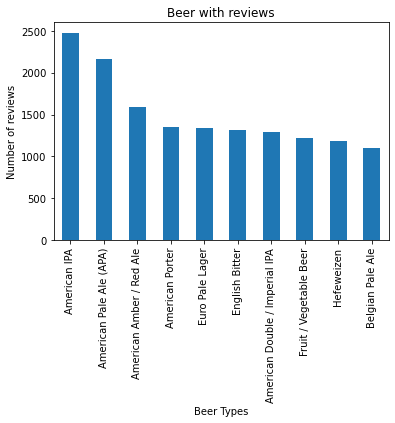

In [21]:
# Plot Beer_style with number of Reviews
beer_style_number[:10].plot(kind='bar')
plt.title('Beer with reviews')
plt.xlabel('Beer Types')
plt.ylabel('Number of reviews')

plt.show()

In [22]:
# Plot Beer_style by overall_reviews
overall_reviews = beer_style_rating.groupby('beer_style').agg(dict(review_overall='mean')).reset_index()
overall_reviews.sort_values('review_overall', ascending=False)

,beer_style,review_overall
28,Bière de Champagne / Bière Brut,4.657895
63,Gueuze,4.627907
62,Gose,4.535714
89,Russian Imperial Stout,4.450967
56,Faro,4.447368
...,...,...
1,American Adjunct Lager,3.606395
53,Euro Pale Lager,3.426857
54,Euro Strong Lager,3.331461
77,Low Alcohol Beer,3.156000


,brewery_name,beer_name,beer_abv
12919,Schorschbräu,Schorschbräu Schorschbock 57%,57.70
12939,Schorschbräu,Schorschbräu Schorschbock 43%,43.00
12940,Schorschbräu,Schorschbräu Schorschbock 43%,43.00
746387,BrewDog,Sink The Bismarck!,41.00
746396,BrewDog,Sink The Bismarck!,41.00
...,...,...,...
748360,BrewDog,Tactical Nuclear Penguin,32.00
748359,BrewDog,Tactical Nuclear Penguin,32.00
748358,BrewDog,Tactical Nuclear Penguin,32.00
748357,BrewDog,Tactical Nuclear Penguin,32.00


C:\Users\patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


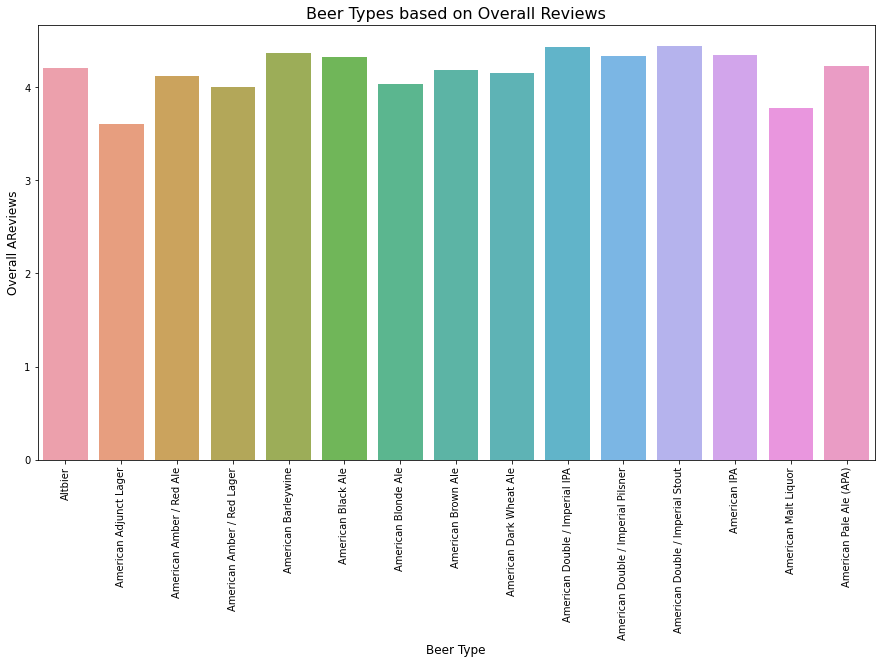

In [23]:
# plot bargraph for beer_style based on overall_reviews
overall_reviews = overall_reviews[:15]
plt.figure(figsize=(15,8))
sns.barplot(overall_reviews['beer_style'], overall_reviews['review_overall'], alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel("Beer Type", fontsize=12)
plt.ylabel("Overall AReviews", fontsize=12)
plt.title("Beer Types based on Overall Reviews", fontsize=16)
plt.show()

In [28]:
# calculate total reviews per beer
beer_style_rating['total_reviews'] =0
beer_overall_best = beer_style_rating.groupby(['beer_name']).agg(dict(brewery_name='first', total_reviews='count', review_overall='median', review_taste='mean', review_aroma='mean')).reset_index()
beer_overall_best.sort_values(by='total_reviews', ascending=False)

,beer_name,brewery_name,total_reviews,review_overall,review_taste,review_aroma
29539,Pale Ale,John Harvard's Brewery & Ale House,100,4.0,3.815000,3.685000
28266,Oktoberfest,Capital Brewery,78,4.0,3.903846,3.596154
20072,India Pale Ale,Shepherd Neame Ltd,77,4.5,4.012987,3.889610
28036,Oatmeal Stout,Glacier Brewhouse,73,4.5,4.089041,3.917808
19685,IPA,Long Trail Brewing Co.,70,4.5,3.950000,3.892857
...,...,...,...,...,...,...
15041,Fred,Hair of the Dog Brewing Company / Brewery and ...,1,5.0,4.500000,4.000000
15042,Fred Brick,Red Brick Brewing Company,1,4.5,3.500000,3.000000
15043,Fred Flanders From The Wood,Hair of the Dog Brewing Company / Brewery and ...,1,4.5,4.000000,5.000000
15044,Fred From The Wood,Hair of the Dog Brewing Company / Brewery and ...,1,5.0,4.500000,5.000000


In [27]:
# # save the DataFrame as csv
# beerinfo_df.to_csv("beer.csv", index = False)

In [30]:
# create csv for reviews table
reviews_df = beer_df[['brewery_id','beer_beerid','review_overall','review_aroma','review_appearance','review_palate', 'review_taste']]

# dropping ALL duplicate values
reviews_df.drop_duplicates(subset ="brewery_id",
                     keep = False, inplace = True)

#drop NaS before exporting the files
reviews_df = reviews_df.dropna(how="any")


<ipython-input-30-ce34b0ca498c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df.drop_duplicates(subset ="brewery_id",


In [31]:
# # save the DataFrame as csv
# reviews_df.to_csv("reviews.csv", index = False)

In [32]:
reviews_df.head()

,brewery_id,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste
2341,13956,30780,1.5,2.0,2.0,2.0,2.0
2342,26983,75708,3.5,3.5,3.5,3.5,3.5
2504,7314,64816,4.0,3.5,4.5,4.0,4.0
2622,15607,61474,4.0,3.5,3.5,3.0,3.5
2654,1746,22746,3.0,3.5,3.0,3.0,3.0


In [85]:
# If asked pick the Top 3 beer consider following factors first three factors:
# 1)review_overall, 
# 2) review_taste,
# 3) beer_abv
# 4) review_aroma, 
# 5) review_appearance 
# 6) review_palate, 

reviews = beer_df.groupby('beer_name').agg({'review_overall': np.mean,
                                'review_taste': np.mean,
                                'beer_abv': np.mean})

picks = pd.DataFrame(reviews.reset_index())

finaltop = picks.sort_values(['review_overall', 'review_taste','beer_abv'], ascending=[False,False, False])
finaltop[:5]

,beer_name,review_overall,review_taste,beer_abv
8210,Campfire Joe,5.0,5.0,17.35
28477,Old Incinerator Brandy Barrel Barleywine,5.0,5.0,13.00
31952,Raspberry Bourbon County Brand Coffee Stout,5.0,5.0,13.00
8049,Calapooia Barleywine,5.0,5.0,11.00
9252,Chicago Terminal Oatmeal Bourbon Stout,5.0,5.0,11.00


In [86]:
# If asked Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer
factors = beer_df[['review_overall','review_aroma','review_taste','review_appearance','review_palate']]
factors.head()

,review_overall,review_aroma,review_taste,review_appearance,review_palate
1586613,5.0,4.5,4.5,4.5,4.5
1054114,5.0,4.0,4.0,4.5,4.5
783659,5.0,5.0,5.0,5.0,5.0
783658,5.0,5.0,5.0,4.0,4.5
1182432,5.0,4.5,4.0,4.0,4.5


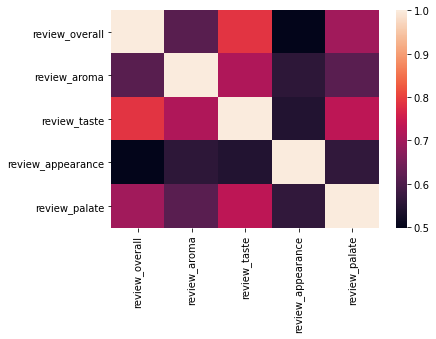

,review_overall,review_aroma,review_taste,review_appearance,review_palate
review_overall,1.000000,0.612484,0.787066,0.498553,0.698800
review_aroma,0.612484,1.000000,0.714365,0.558879,0.614545
review_taste,0.787066,0.714365,1.000000,0.544454,0.731932
review_appearance,0.498553,0.558879,0.544454,1.000000,0.564313
review_palate,0.698800,0.614545,0.731932,0.564313,1.000000


In [87]:
corr = factors.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

display(factors.corr())

In [12]:
# If asked assume someone enjoy a beer due to its aroma and appearance, which beer style should we recommend them?

enjoy = beer[['review_aroma','review_appearance','beer_style']]
enjoy.head()

,review_aroma,review_appearance,beer_style
0,2.0,2.5,Hefeweizen
1,2.5,3.0,English Strong Ale
2,2.5,3.0,Foreign / Export Stout
3,3.0,3.5,German Pilsener
4,4.5,4.0,American Double / Imperial IPA


In [13]:
enjoy_beer1 = enjoy.groupby('beer_style').agg({'review_aroma': np.mean,
                                'review_appearance': np.mean})
enjoy_beer1 = pd.DataFrame(enjoy_beer1.reset_index())
enjoy_beer1.columns = ['beer_style','review_aroma_mean','review_appearance_mean']



enjoy_beer2 = enjoy.groupby('beer_style').agg({'review_aroma': np.max,
                                             'review_appearance': np.max})
enjoy_beer2 = pd.DataFrame(enjoy_beer2.reset_index())
enjoy_beer2.columns = ['beer_style','review_aroma_max','review_appearance_max']


enjoy_beer3 = enjoy.groupby('beer_style').agg({'review_aroma': np.size,
                                             'review_appearance': np.size})
enjoy_beer3 = pd.DataFrame(enjoy_beer3.reset_index())
enjoy_beer3.columns = ['beer_style','review_aroma_count','review_appearance_count']


enjoy_beer = pd.merge(pd.merge(enjoy_beer2, enjoy_beer1, on='beer_style'),enjoy_beer3, on='beer_style')
enjoy_beer.head()

,beer_style,review_aroma_max,review_appearance_max,review_aroma_mean,review_appearance_mean,review_aroma_count,review_appearance_count
0,Altbier,5.0,5.0,3.624015,3.809327,7741,7741
1,American Adjunct Lager,5.0,5.0,2.480211,2.788546,30749,30749
2,American Amber / Red Ale,5.0,5.0,3.627254,3.810190,45751,45751
3,American Amber / Red Lager,5.0,5.0,3.213296,3.527494,9311,9311
4,American Barleywine,5.0,5.0,4.019343,4.036535,26728,26728


In [88]:
#Tope 5 recomended beers list:
recomd = enjoy_beer.sort_values(['review_aroma_count','review_appearance_count','review_aroma_mean', 'review_appearance_mean','review_aroma_max','review_appearance_max'], ascending=[False, False,False, False, False, False])
top = recomd[:5]['beer_style']
top

NameError: name 'enjoy_beer' is not defined

In [ ]:
# plot reviews per beer
beer_df.count()

In [ ]:
# plot number of beers produced by brewery